## Programming for A&A - Assignment 2
## Kaya Han Taş - 15064735

### 1-) 
### Read in the data using "genfromtxt" and "clean" the data by removing rows from the resulting array which contain "nan" values. (Note that both the time and flux columns may contain these values.) 

### Plot your cleaned Light Curve.

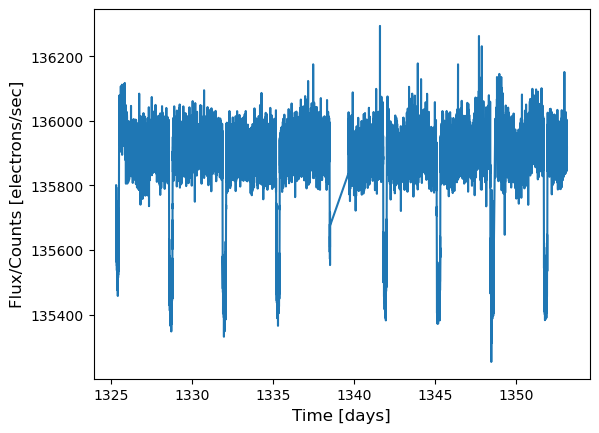

In [609]:
#Since the question states one data, we'll use tess_lc1.

#We first import numpy since genfromtxt is from the numpy library.
#We also import matplotlib.pyplot for plotting purposes.
import numpy as np
import matplotlib.pyplot as plt

#Using genfromtxt to get the data from the file.
lc_data = np.genfromtxt("tess_lc1.dat", comments = "#") # "#" will skip the headers

#print("Uncleaned data: ", "\n", lc_data, "\n") #remove "#" to check uncleaned data

#To clear the "nan" data we need to create a mask.
#For that we can use np.isnan() function!
#This will give us an array of Boolean Values True & False.
    #If the array element is True, that means the value is NaN.
    #If the array element is False, that means the value is not NaN.

lc_data_mask = np.isnan(lc_data)

# "~" will invert Boolean Values in the array we have created, which means that:
    #If the array element is True, that means the value is not NaN.
    #If the array element is False, that means the value is NaN.

#Thanks to this, we can use "data[~mask]" to get all the values that aren't NaN.
#We use axis = 1 to check all the columns for non-NaN values! (So "True" values)
#This way, our data will be cleaned from all the "NaN" values.

lc_data = lc_data[~np.any(lc_data_mask, axis=1)]

#print("Cleaned data: ", "\n", lc_data,"\n") #remove "#" to check cleaned data

#Now that we have cleaned our data, let's plot the light curve.
plt.figure() #Creating the figure

#Since our data contains time on the first column and flux/count on second column:
#lc_data[ :  , 0] => Will give us all the rows in the 0. index column so all the times
#lc_data[ :  , 1] => Will give us all the rows in the 1. index column so all the fluxes

plt.plot(lc_data[ :  , 0], lc_data[ :  , 1])

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

### 2-) Use the cleaned data to do the following analysis to help you confirm the period of the transiting exoplanet:
### Smooth the light curve by averaging each data point together with the two (or more - see what works) data points on either side (i.e. for smoothing with the 2 points on each side, you measure the average of a "sliding window" of 5 data points centered on each data point).
### Plot the smoothed light curve along with "zoomed-in" segment of the light curve showing an eclipse.
### Use the full smoothed light curve and a periodogram (e.g., a Lomb-Scargle Periodogram, see lesson 17) to determine the likely Orbital Period of the transiting exoplanet (plot the periodogram and identify the highest peak).

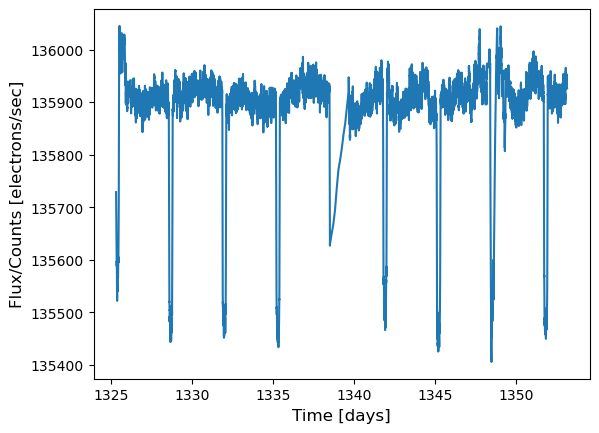

In [610]:
#We use np.convolve to do the smoothing.
#It takes our "data" with the "window array" that we will define.
#An example for convolution can be seen below:
    #Let x=[3 4] and y=[1 1 5 5] be our arrays.
    #So "window array" x will pass through the y array and do the calculations
    #as shown below.
    #Note that we choose "same" mode in order to get same array size from the convolution!!!
    
    # >>> np.convolve(x, y, mode="same")
    # First step: [3 4] [1 1] => 3*1 + 4*1 = 7
    # Second step: [3 4] [1 5] => 3*1 + 4*5 = 23
    # Third step: [3 4] [5 5] => 3*5 + 4*5 = 35
    # Resulting Array: [7 23 35]

#In our case:
    #The Window Array must have 1/window_size as elements because our goal is to
    #take the average of the sum of the elements in our original dataset.

def smoothing(data, window_size):
    """Takes the 2D Array Data and the Sliding Window size that the user 
    provides, calculates the average of each datapoint, in two axes, in the 
    given window size interval by the user.
    
    Example:
    --------------------------------------------------------------------------
    Input to the Function:
    >>> data = np.array([1 2], [3 4], [5 6], [7 8], [9 10], [11 12])
    >>> window_size = 3
    
    Function creates a "sliding window":
    >>> sliding_window = np.array([1/3 1/3 1/3])
    
    Function uses np.convolve to smooth the data:
    >>> First Column (data[ : , 0])
    > Step 1: [1 3 5] [1/3 1/3 1/3] => 1*1/3 + 3*1/3 + 5*1/3 = 3
    > Step 2: [3 5 7] [1/3 1/3 1/3] => 3*1/3 + 5*1/3 + 7*1/3 = 5
    > Step 3: [5 7 9] [1/3 1/3 1/3] => 5*1/3 + 7*1/3 + 9*1/3 = 7 etc.
    
    >>> Second Column (data[ : , 1])
    > Step 1: [2 4 6] [1/3 1/3 1/3] => 2*1/3 + 4*1/3 + 6*1/3 = 4
    > Step 2: [4 6 8] [1/3 1/3 1/3] => 4*1/3 + 6*1/3 + 8*1/3 = 6
    > Step 3: [6 8 10] [1/3 1/3 1/3] => 6*1/3 + 8*1/3 + 10*1/3 = 8 etc.
    
    >>> Result:
    > time_smoothed = np.array([3 5 7 9])
    > data_smoothed = np.array([4 6 8 10])
    
    >>> Return:
    > lc_smooth = np.array([[3 4] 
                            [5 6] 
                            [7 8]
                            [9 10]])
    
    """
    
    #Defining our "sliding" window array.
    #The sliding window: 
        #Will have rows depending on how large our window size is.
        #It will only have one column.
        #It's elements will be 1/window_size due to us wanting to get the
        #average of the sum of the elements!
        
    sliding_window = np.full((window_size, 1), 1/window_size)
    
    time_smoothed = np.convolve(data[ : , 0], sliding_window[ : , 0], mode="valid")
    data_smoothed = np.convolve(data[ : , 1], sliding_window[ : , 0], mode="valid")
    
    #For convenience, let's combine both arrays together.
    time_smoothed = time_smoothed[ : , np.newaxis] #Creates a new axis on our 1D Array
    data_smoothed = data_smoothed[ : , np.newaxis] #Creates a new axis on our 1D Array
    
    #We stack them horizontally so that it is back to its original form where
    #Column 0 shows time and Column 1 shows flux/count.
    lc_smooth = np.hstack((time_smoothed, data_smoothed))
    
    return lc_smooth

lc_smooth = smoothing(lc_data, 11) #So we take average of 11 elements

#Now we can plot the smoothed light curve.
plt.figure() #Creating the figure

plt.plot(lc_smooth[ : , 0], lc_smooth[ : , 1])

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

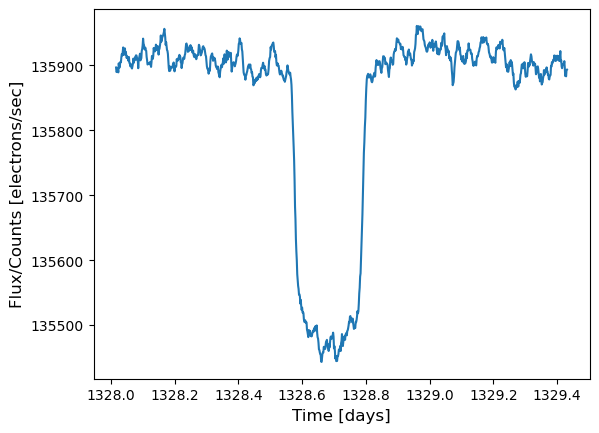

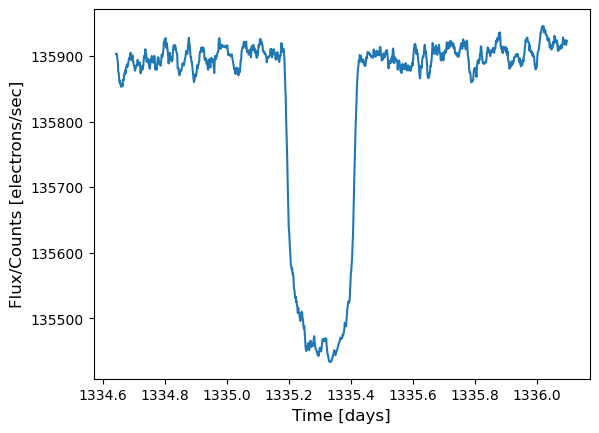

In [611]:
#We can now also plot the "zoomed in" light curves as follows.

#Example 1:
#----------------------------------------------------------------------
plt.figure() #Creating the figure

#We pick an interval that has an "eclipse"
plt.plot(lc_smooth[1900 : 2900, 0], lc_smooth[1900 : 2900, 1])

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

#Example 2:
#----------------------------------------------------------------------
plt.figure() #Creating the figure

#We pick an interval that has an "eclipse"
plt.plot(lc_smooth[6500 : 7500, 0], lc_smooth[6500 : 7500, 1])

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

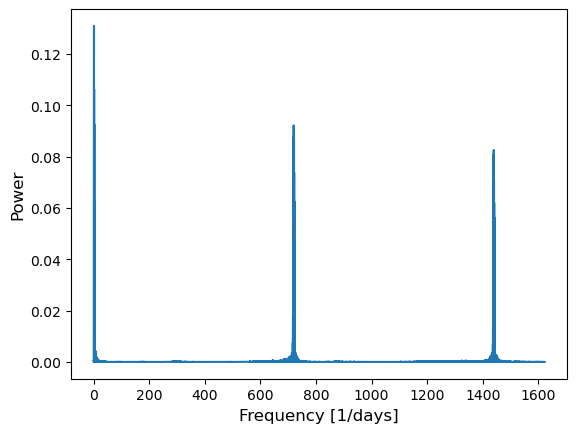

In [612]:
#Now we need to find the Periodogram to determine the likely orbital period of
#the transiting exoplanet.
#Since there are gaps in our time-series, we use Lomb-Scargle Periodogram!
from astropy.timeseries import LombScargle

#We use LombScargle which takes two arrays in order to find power spectrum/Periodogram!
Frequency, Power = LombScargle(lc_smooth[ : , 0], lc_smooth[ : , 1]).autopower()

#We can plot the resulting Power Spectrum/Periodogram.
plt.figure() #Creating the figure

plt.plot(Frequency, Power)

#Frequency is 1/Days because in our curve time was also in days.
#If it was in seconds, we would use frequency in Hz!
plt.xlabel("Frequency [1/days]", fontsize=12)
plt.ylabel("Power", fontsize=12)

plt.show()

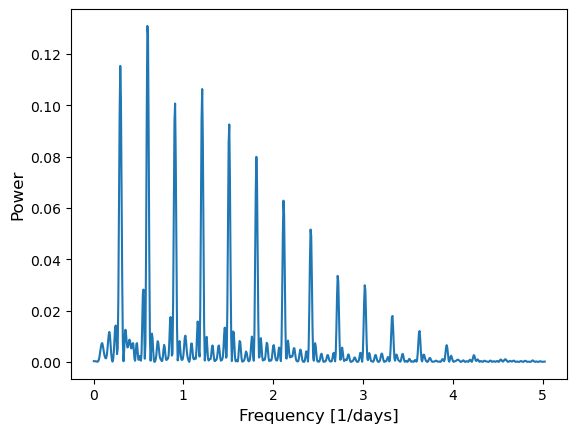

In [613]:
#Since we can't really define the true/fundamental Frequency, it would be 
#reasonable for us to "zoom in"

#Note: The reason why we are seing 3 peaks is because of the multiples of
#sampling frequency. Since there are samples every 2 minutes, this results
#in roughly 720 samples per day (where the 2nd peak is!). For this reason
#we only focus on the first peak.

plt.figure() #Creating the figure

plt.plot(Frequency[0:700], Power[0:700])

#Or do the Lomb Scargle again by limiting the max frequency to for example 5.
#Frequency, Power = LombScargle(lc_time_smooth, lc_flux_smooth).autopower(maximum_frequency = 5)

plt.xlabel("Frequency [1/days]", fontsize=12)
plt.ylabel("Power", fontsize=12)

plt.show()

In [614]:
#We can see that the fundamental peak, which we'll have to take, is near 0.2 to 0.3.
#For this reason, we can find this peak by the following code.

peak_power = np.max(Power[0:60]) #The maximum power between the first "small" interval.

print("The Fundamental Peak's Power: ", "\n", peak_power)

The Fundamental Peak's Power:  
 0.11528718165113112


In [615]:
#Now we should find what that power's frequency is.
#For this we use the following code.

index_frequency = np.where(Power == peak_power)
peak_frequency = Frequency[index_frequency][0]

print("The Fundamental Peak's Frequency: ", "\n", peak_frequency)

The Fundamental Peak's Frequency:  
 0.297996796572552


In [616]:
#Orbital Period can be found with (T = 1/frequency) in the days unit since
#in our case, frequency is in terms of [days^-1]
#So, we can find the following Orbital Period result.
Orbital_Period = 1/peak_frequency #in days

print("Orbital Period of the Exoplanet: ", "\n",
     "In Days: ", Orbital_Period, "days", "\n",
     "In Hours: ", Orbital_Period*60, "hours", "\n",
     "In Minutes: ", Orbital_Period*(60*24), "mins", "\n",
     "In Seconds: ", Orbital_Period*(60*24*30), "sec", "\n")

Orbital Period of the Exoplanet:  
 In Days:  3.3557407713828704 days 
 In Hours:  201.34444628297223 hours 
 In Minutes:  4832.266710791333 mins 
 In Seconds:  144968.00132374 sec 



### 3-) Finally, you will try to fit a model to the shape of the eclipse in the light curve, to constrain its parameters and measure a more accurate orbital period.

### a-) Write a function which will calculate the following functional form for the Light Curve Flux (e.g. Count Rate) when there is an eclipse, when given the time values.
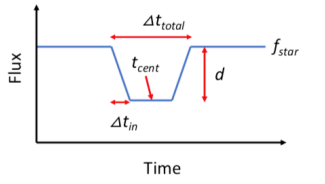
### Your function should use the variables shown in the diagram above. 
### $\Delta t_{total}$ is the total duration of the eclipse (from start to finish).
### $\Delta t_{in}$ is the ingress time (the time from start of the eclipse until the maximum depth ($d$) of the eclipse is reached).
### $t_{cent}$ is the time corresponding to the mid-point of the eclipse.
### $f_{star}$ is the flux level of the star when not eclipsed.
### You can assume that the eclipse egress time (time of rising flux at the end of the eclipse) is the same as the ingress time ($\Delta t_{in}$ = $\Delta t_{eg}$)

In [747]:
#We can:
    # Model the left and right sides of the eclipse with a straight line.
    # Model the eclipse with a sine wave.
    # Normalize the flux to 1 so that we can do 1-alpha (eclipse rate) to
    #find the resulting curve.

#A Sine Wave = y(t) = A*sin(2πft+ϕ)
    # y(t) = The value of the sine wave at time t
    # A = Amplitude of the wave, so basically the depth of our eclipse d.
    # 2π = Frequency measured in cycles per second.
    # f = Frequency of the wave (So period of the wave, which is 1 cycle is 1/f)
    # t = Time
    # ϕ = Phase Angle (Shifts the wave horizontally along x/time axis)

#In our Light Curve:
    # From the starting point to the ending point of the eclipse is one cycle.
    # So in this case, total eclipse time gives us the period/cycle/(1/frequency).
    # Amplitude of the wave is obviously the Depth of our eclipse.
    # From t=0 to time_center => Will give us the ingress time.
    # And vice versa will give us the egress time which is equal to ingress time.
    # Normalizing the light curve should be an approach we need to take so
    #our star's flux will be equal to 1 when star is not eclipsed.

#We pick an interval that has an "eclipse"
data_test=lc_smooth[6820 : 7080, 0]

#Since the function has to give us the values for flux, we'll only use the
#time values from our dataset!

def light_curve_fit(data, time_total, time_ingress, time_center, flux_star, depth):
    """Takes the time data alongside Total Eclipse Time (time_total), Ingress 
    Time (time_ingress), Time of the maximum eclipse (time_center), Flux of 
    the star without any eclipse (flux_star) and the Depth of the eclipse curve.
    
    Returns the fitted results for Flux for given time period using the given
    parameters."""
    #We know that before and after the eclipse, the flux of the star should be
    #constant (of course there are variations in our data but that could be 
    #either stellar variability or calibration issues).
    #So for that reason, fitting a linear function that has a slope of zero so
    #that f(x)=ax+b => f(x) = flux_star will be reasonable.
    
    #When it comes to the eclipse itself, it will be provided to this function.
    #We can do the following assumptions for the eclipse since we have the times
    #in the following equations given to us.
        # start time = center time - ingress time
        # end time = center time + ingress time (since it's equal to egress time)
    
    #So from start time of the eclipse to the end time of the eclipse, we have
    #to fit a sine wave to our data.
    #The sine wave is equal to the following:
        # y = ((depth) * np.sin(np.pi(1/total time)*current time))
        # We know that the Amplitude of our "half-sine" wave is our depth!
        # When it comes to the Period of the half-sine wave we are modelling
        #our eclipse with, we know that we are dealing with π.
        # Also, since we deal with frequency, 1/total time would give us the
        #frequency of our eclipse.
    
    #Using this info, first let's create an array for our fitting values.
    fitted_values = np.array([])
    
    #We also can get a new value for time_total from optimize function we will
    #use soon so..
    time_total = 2*time_ingress
    
    for i in range(len(data[ : ])): #Checking the length of one of the columns
        #If the time is before the eclipse begins, add star flux to our fit data.
        if data[i] <= (time_center - time_ingress):
            fitted_values = np.append(fitted_values, flux_star)
        
        #If the time is between the start time and the end time of the eclipse,
        #add the flux_star - sine wave value.
        elif (time_center - time_ingress) < data[i] <= (time_center + time_ingress):
            sine_value = (depth) * np.sin(np.pi*(1/(time_total))*data[i])
            fitted_values = np.append(fitted_values, flux_star-sine_value)
        
        #Finally, If time is after the eclipse ends, add star flux to our fit data.
        elif data[i] > (time_center + time_ingress):
            fitted_values = np.append(fitted_values, flux_star)
    
    return fitted_values

### b-) Use your function with a subset of the cleaned (but unsmoothed) light curve, to fit one of the eclipses using scipy.optimize.curve_fit (you should not include any error bars in the fit, it is fine to assume all the data errors are the same for the purpose of the Assignment) and obtain the fit parameters described above.

### Plot the data and the model together on the same plot.

Best Fitting Parameters:  
 Total Time of the Eclipse:  0.257 
 Total Time of Ingress:  0.12850591781579207 
 Time of Maximum Eclipse:  1335.3 
 Flux of the Star:  135879.11547383905 
 Depth of the Eclipse:  -500.3403797038938 



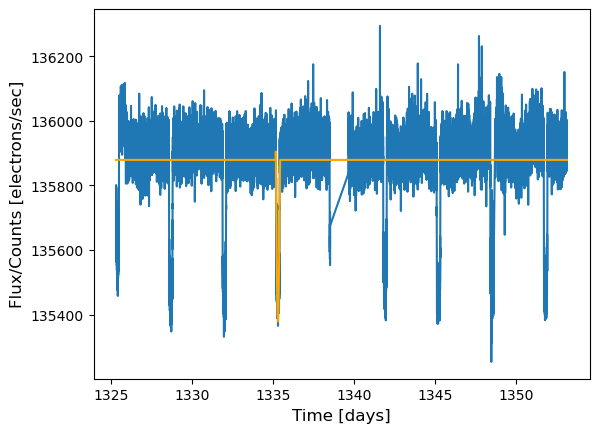

In [765]:
#We import the library.
from scipy import optimize

#We do the fitting by using our defined light_curve_fit function and
#scipy.optimize.curve_fit!

parameters, parameters_covariance = optimize.curve_fit(light_curve_fit, lc_data[6820 : 7080 , 0], lc_data[6820 : 7080 , 1], p0=[0.257, 0.1285, 1335.30, 135900, 380])
print("Best Fitting Parameters: ", "\n",
     "Total Time of the Eclipse: ", parameters[0], "\n",
     "Total Time of Ingress: ", parameters[1], "\n",
     "Time of Maximum Eclipse: ", parameters[2], "\n",
     "Flux of the Star: ", parameters[3], "\n",
     "Depth of the Eclipse: ", parameters[4], "\n")

#Now we take the fitted values of the parameters to create our fit.
fitted_values = light_curve_fit(lc_data[ : , 0], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])

plt.figure() #Creating the figure

#We finally fit our data with our fitted values.
plt.plot(lc_data[ : , 0], lc_data[ : , 1])
plt.plot(lc_data[ : , 0], fitted_values[ : ], color="orange")

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

### 4-)
### Try your method on one Light Curve Eclipse first (Whichever shows the clearest signal is probably the best one to start with).

### Then, apply it to the other Light Curve Eclipses, adapting the starting arguments/parameter values for the fits as needed.

Best Fitting Parameters:  
 Total Time of the Eclipse:  0.257 
 Total Time of Ingress:  0.12850580825673252 
 Time of Maximum Eclipse:  1335.32 
 Flux of the Star:  135871.8491766612 
 Depth of the Eclipse:  -490.709956377251 



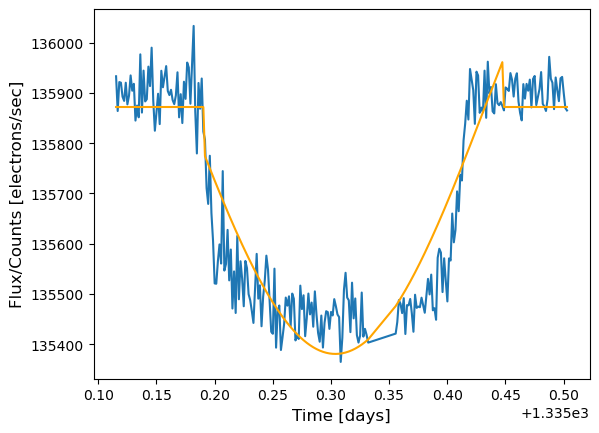

In [766]:
#"Zooming-in" on our first light curve eclipse we have analyzed on the previous
#question.

parameters, parameters_covariance = optimize.curve_fit(light_curve_fit, lc_data[6820 : 7080, 0], lc_data[6820 : 7080, 1], p0=[0.257, 0.1285, 1335.32, 135900, 380])
print("Best Fitting Parameters: ", "\n",
     "Total Time of the Eclipse: ", parameters[0], "\n",
     "Total Time of Ingress: ", parameters[1], "\n",
     "Time of Maximum Eclipse: ", parameters[2], "\n",
     "Flux of the Star: ", parameters[3], "\n",
     "Depth of the Eclipse: ", parameters[4], "\n")

#Now we take the fitted values of the parameters to create our fit.
fitted_values = light_curve_fit(lc_data[6820 : 7080, 0], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])

plt.figure() #Creating the figure

#We finally fit our data with our fitted values.
plt.plot(lc_data[6820 : 7080, 0], lc_data[6820 : 7080, 1])
plt.plot(lc_data[6820 : 7080, 0], fitted_values[ : ], color="orange")

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

Best Fitting Parameters:  
 Total Time of the Eclipse:  0.25 
 Total Time of Ingress:  0.1249874924605379 
 Time of Maximum Eclipse:  1332.0 
 Flux of the Star:  135863.8127149483 
 Depth of the Eclipse:  476.01072942288306 



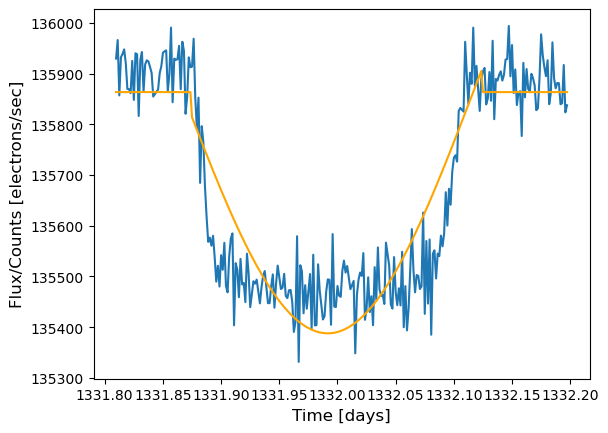

In [767]:
#Another Eclipse

parameters, parameters_covariance = optimize.curve_fit(light_curve_fit, lc_data[4530 : 4800, 0], lc_data[4530 : 4800, 1], p0=[0.25, 0.125, 1332.00, 135900, 450])
print("Best Fitting Parameters: ", "\n",
     "Total Time of the Eclipse: ", parameters[0], "\n",
     "Total Time of Ingress: ", parameters[1], "\n",
     "Time of Maximum Eclipse: ", parameters[2], "\n",
     "Flux of the Star: ", parameters[3], "\n",
     "Depth of the Eclipse: ", parameters[4], "\n")

#Now we take the fitted values of the parameters to create our fit.
fitted_values = light_curve_fit(lc_data[4530 : 4800, 0], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])

plt.figure() #Creating the figure

#We finally fit our data with our fitted values.
plt.plot(lc_data[4530 : 4800, 0], lc_data[4530 : 4800, 1])
plt.plot(lc_data[4530 : 4800, 0], fitted_values[ : ], color="orange")

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

Best Fitting Parameters:  
 Total Time of the Eclipse:  0.26 
 Total Time of Ingress:  0.12999320924939903 
 Time of Maximum Eclipse:  1341.92 
 Flux of the Star:  135912.39726047748 
 Depth of the Eclipse:  -480.2289453039896 



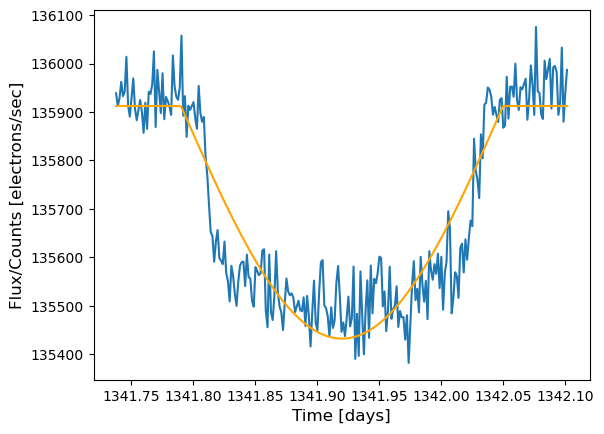

In [768]:
#One more Eclipse

parameters, parameters_covariance = optimize.curve_fit(light_curve_fit, lc_data[10700 : 10960, 0], lc_data[10700 : 10960, 1], p0=[0.26, 0.13, 1341.92, 135900, 375])
print("Best Fitting Parameters: ", "\n",
     "Total Time of the Eclipse: ", parameters[0], "\n",
     "Total Time of Ingress: ", parameters[1], "\n",
     "Time of Maximum Eclipse: ", parameters[2], "\n",
     "Flux of the Star: ", parameters[3], "\n",
     "Depth of the Eclipse: ", parameters[4], "\n")

#Now we take the fitted values of the parameters to create our fit.
fitted_values = light_curve_fit(lc_data[10700 : 10960, 0], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])

plt.figure() #Creating the figure

#We finally fit our data with our fitted values.
plt.plot(lc_data[10700 : 10960, 0], lc_data[10700 : 10960, 1])
plt.plot(lc_data[10700 : 10960, 0], fitted_values[ : ], color="orange")

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

Best Fitting Parameters:  
 Total Time of the Eclipse:  0.26 
 Total Time of Ingress:  0.1299955532837651 
 Time of Maximum Eclipse:  1328.685 
 Flux of the Star:  135906.35810303915 
 Depth of the Eclipse:  516.6477419594194 



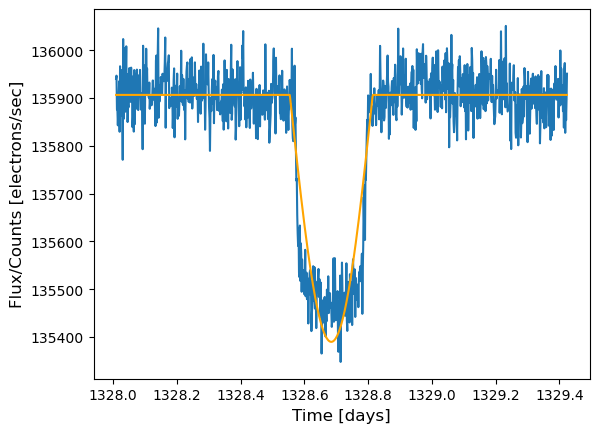

In [769]:
#Final Eclipse Example

parameters, parameters_covariance = optimize.curve_fit(light_curve_fit, lc_data[1900 : 2900, 0], lc_data[1900 : 2900, 1], p0=[0.26, 0.13, 1328.685, 135900, 512])
print("Best Fitting Parameters: ", "\n",
     "Total Time of the Eclipse: ", parameters[0], "\n",
     "Total Time of Ingress: ", parameters[1], "\n",
     "Time of Maximum Eclipse: ", parameters[2], "\n",
     "Flux of the Star: ", parameters[3], "\n",
     "Depth of the Eclipse: ", parameters[4], "\n")

#Now we take the fitted values of the parameters to create our fit.
fitted_values = light_curve_fit(lc_data[1900 : 2900, 0], parameters[0], parameters[1], parameters[2], parameters[3], parameters[4])

plt.figure() #Creating the figure

#We finally fit our data with our fitted values.
plt.plot(lc_data[1900 : 2900, 0], lc_data[1900 : 2900, 1])
plt.plot(lc_data[1900 : 2900, 0], fitted_values[ : ], color="orange")

plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Flux/Counts [electrons/sec]", fontsize=12)

plt.show()

### Additional Notes:
### There are small peaks on the left and right side of my fits that I couldn't figure out the reason for.
### It is dependent on the starting "Time of Maximum Eclipse" value. 

### I've worked with light curves and as far as I know/remember, T0 (Time of Maximum Eclipse) shifts the graph to left or right drastically by small changes in value and since my sine wave function & linear fit are seperated, that might cause those "peaks".
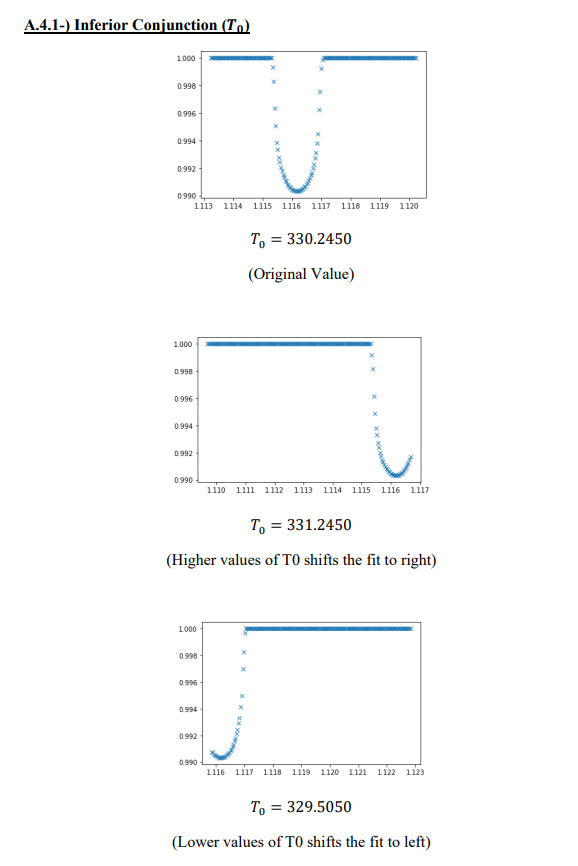

### Possible Reasons: 
* The ingress and total time are not changing by using optimize.curve_fit?
* T0 needs to be put into the function very precisely?